Design a model to predict the housing price from Dataset using Multivariate Linear Regression.

In [10]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('Data/realest.csv')
print("Original Data Head:")
print(df.head())

Original Data Head:
   Price  Bedroom   Space  Room   Lot     Tax  Bathroom  Garage  Condition
0   53.0      2.0   967.0   5.0  39.0   652.0       1.5     0.0        0.0
1   55.0      2.0   815.0   5.0  33.0  1000.0       1.0     2.0        1.0
2   56.0      3.0   900.0   5.0  35.0   897.0       1.5     1.0        0.0
3   58.0      3.0  1007.0   6.0  24.0   964.0       1.5     2.0        0.0
4   64.0      3.0  1100.0   7.0  50.0  1099.0       1.5     1.5        0.0


Importing and Printing The Head of the Data

In [12]:
print("\nData Info:")
df.info()
df.fillna(df.mean(), inplace=True)
print("\nData Info after handling missing values:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    float64
 1   Bedroom    156 non-null    float64
 2   Space      146 non-null    float64
 3   Room       156 non-null    float64
 4   Lot        146 non-null    float64
 5   Tax        147 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB

Data Info after handling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      157 non-null    float64
 1   Bedroom    157 non-null    float64
 2   Space      157 non-null    float64
 3   Room       157 non-null    float64
 4   Lot        1

Getting Info and Handling missing values of the dataset

In [13]:
# Define features (X) and target (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Definfing the Values of X and Y and Spliting into Training and Testing sets

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Creating and Training Linear Regression Model & Making Prediction on test case

In [15]:
print('\nModel Evaluation:')
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('R-squared (R²):', metrics.r2_score(y_test, y_pred))


Model Evaluation:


NameError: name 'metrics' is not defined

Evaluating the model

In [16]:
print('\nModel Coefficients:')
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


Model Coefficients:
           Coefficient
Bedroom      -3.383436
Space         0.006339
Room          3.027600
Lot           0.207062
Tax           0.005776
Bathroom      5.497968
Garage        4.531928
Condition     0.433868


Display the model's coefficients

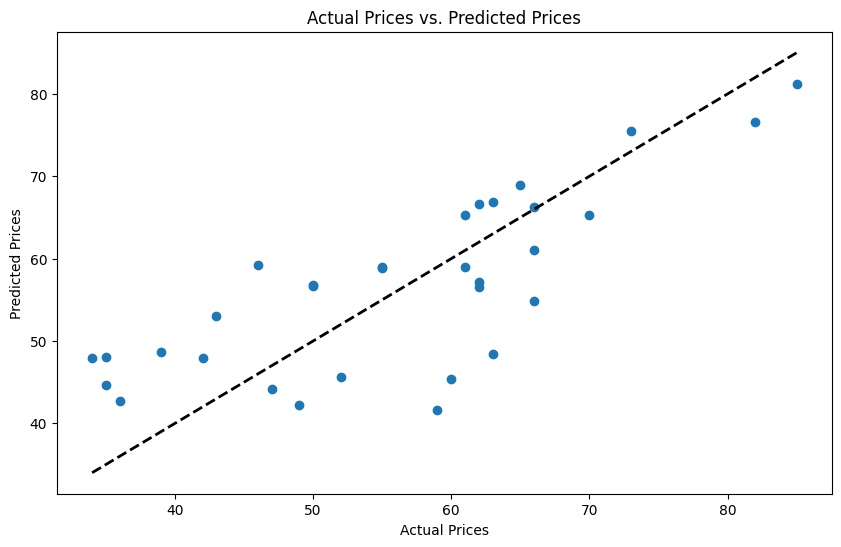

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line
plt.savefig('actual_vs_predicted.png')

Visualize the predictions vs. actual values

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, kde=True, bins=15)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.savefig('residuals_distribution.png')